In [1]:
from datetime import datetime, date, time
import numpy as np
import math
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
import random
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns
from  matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

In [35]:
df = pd.read_excel('HW1_var_7 (1).xlsx')

In [3]:
df.replace('*n.a.*', inplace=True)

Номер варианта           None
ID                       None
INCOME_BASE_TYPE         None
CREDIT_PURPOSE           None
INSURANCE_FLAG           None
DTI                      None
SEX                      None
FULL_AGE_CHILD_NUMBER    None
DEPENDANT_NUMBER         None
EDUCATION                None
EMPL_TYPE                None
EMPL_SIZE                None
BANKACCOUNT_FLAG         None
Period_at_work           None
age                      None
EMPL_PROPERTY            None
EMPL_FORM                None
FAMILY_STATUS            None
max90days                None
max60days                None
max30days                None
max21days                None
max14days                None
avg_num_delay            None
if_zalog                 None
num_AccountActive180     None
num_AccountActive90      None
num_AccountActive60      None
Active_to_All_prc        None
numAccountActiveAll      None
numAccountClosed         None
sum_of_paym_months       None
all_credits              None
Active_not

In [13]:
# проверка на дубликаты
df.duplicated(keep='first').sum()

0

In [36]:
df.EMPL_SIZE.unique()

array(['>250', '>=50', '>=100', '>=200', '< 50', nan, '>100', '>=150'],
      dtype=object)

In [37]:
def f(x):
    mapping = {'>250':np.random.randint(251,MAX),
      '>=50': np.random.randint(50,MAX),
      '>=100': np.random.randint(100,MAX),
      '>=200': np.random.randint(200,MAX),
      '< 50': np.random.randint(MIN,49),
      '>100': np.random.randint(101,MAX),
      '>=150': np.random.randint(150,MAX)}
    random_number = mapping.get(x,None)
    return random_number

In [38]:
MAX=500
MIN=20
df.EMPL_SIZE = df.EMPL_SIZE.map(f)


In [42]:
df.EMPL_SIZE.unique()

array([493., 252., 344., 491., 498., 279., 469., 417., 294., 273., 371.,
       337., 357., 334., 446., 313., 251., 368., 269., 254., 286., 457.,
       128., 486., 325., 328., 467., 438., 329.,  41., 495., 448., 480.,
       381., 253.,  nan, 389.,  20., 477.,  34., 474., 260., 256., 404.,
       490., 338.,  23., 272., 478.,  30., 398.,  28., 436., 297.,  48.,
       410., 377., 401., 358., 342., 331.,  36., 285., 442., 166., 352.,
       299., 303., 471., 391., 408.,  35., 271., 322., 406., 428., 488.,
       265., 424., 473., 454., 372., 245., 439., 475.,  39., 440., 164.,
       318., 267.,  47., 182., 293., 305., 316., 423., 418., 459., 450.,
       414., 332., 359., 451., 375., 321., 407., 468., 346., 249., 426.,
        21., 277., 307., 353., 284., 315., 261., 129., 464., 317., 412.,
       348., 395.,  64., 268., 431., 453., 181., 370., 393., 445., 330.,
       364., 275., 306., 462., 444., 402., 184., 180., 363.,  29., 405.,
       351., 280.,  38., 292.,  37., 282., 250.,  2

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10243 entries, 0 to 10242
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Номер варианта         10243 non-null  int64  
 1   ID                     10243 non-null  int64  
 2   INCOME_BASE_TYPE       10180 non-null  object 
 3   CREDIT_PURPOSE         10243 non-null  object 
 4   INSURANCE_FLAG         10243 non-null  int64  
 5   DTI                    10120 non-null  float64
 6   SEX                    10243 non-null  object 
 7   FULL_AGE_CHILD_NUMBER  10243 non-null  int64  
 8   DEPENDANT_NUMBER       10243 non-null  int64  
 9   EDUCATION              10243 non-null  object 
 10  EMPL_TYPE              10232 non-null  object 
 11  EMPL_SIZE              10121 non-null  float64
 12  BANKACCOUNT_FLAG       7908 non-null   float64
 13  Period_at_work         7906 non-null   float64
 14  age                    7908 non-null   float64
 15  EM

In [43]:
df_info = []
for col in df:
    df_info.append(df[col].unique().size)
    zero_count = (df[col] == 0).sum()
    df_info.append(zero_count)
    df_info.append(round((zero_count / df.shape[0]) * 100, 2))
    empty_count = df[col].isna().sum()
    df_info.append(empty_count)
    df_info.append(round((empty_count / df.shape[0]) * 100, 2))

In [64]:
hw_1 = pd.DataFrame(np.array(df_info).reshape(44, 5), columns = ["кол-во уникальных", "кол-во нулей", "доля нулей",
                                                            "кол-во пропущенных","доля пропущенных"], index = df.columns)
hw_1.to_excel("uniques_and_zeros.xlsx")
hw_1

,кол-во уникальных,кол-во нулей,доля нулей,кол-во пропущенных,доля пропущенных
Номер варианта,1.0,0.0,0.00,0.0,0.00
ID,10243.0,0.0,0.00,0.0,0.00
INCOME_BASE_TYPE,5.0,0.0,0.00,63.0,0.62
CREDIT_PURPOSE,10.0,0.0,0.00,0.0,0.00
INSURANCE_FLAG,2.0,4088.0,39.91,0.0,0.00
DTI,59.0,1.0,0.01,123.0,1.20
SEX,2.0,0.0,0.00,0.0,0.00
FULL_AGE_CHILD_NUMBER,8.0,6085.0,59.41,0.0,0.00
DEPENDANT_NUMBER,4.0,10216.0,99.74,0.0,0.00
EDUCATION,9.0,0.0,0.00,0.0,0.00


In [21]:
##проверка нечисловых переменных
df.CREDIT_PURPOSE.unique()

array(['Покупка недвижимости/ строительство', 'Ремонт',
       'Покупка бытовой техники', 'Покупка мебели', 'Другое',
       'Покупка автомобиля', 'Отпуск', 'Лечение', 'Покупка земли',
       'Обучение'], dtype=object)

In [22]:
df.SEX.unique()

array(['мужской', 'женский'], dtype=object)

In [23]:
df.EDUCATION.unique()

array(['высшее', 'Высшее/Второе высшее/Ученая степень',
       'среднее-специальное', 'второе высшее', '*n.a.*', 'среднее',
       'незаконченное высшее', 'Неполное среднее', 'ученая степень'],
      dtype=object)

In [24]:
df.EMPL_TYPE.unique()

array(['специалист', 'менеджер среднего звена', 'менеджер по продажам',
       'рабочий', 'вспомогательный персонал', 'торговый представитель',
       'другое', 'менеджер высшего звена', nan, 'страховой агент'],
      dtype=object)

In [25]:
df.EMPL_PROPERTY.unique()

array(['Наука', nan, 'Информационные технологии', 'Торговля',
       'Производство', 'Другое', 'Туризм', 'Финансы',
       'Государственная служба', 'Строительство', 'Транспорт',
       'Юридические услуги', 'Сельское и лесное хозяйство'], dtype=object)

In [26]:
df.EMPL_FORM.unique()

array([nan, 'ООО', 'Государственное предприятие', 'ОАО',
       'Индивидуальный предприниматель', 'Иная форма', 'ЗАО'],
      dtype=object)

In [27]:
df.FAMILY_STATUS.unique()

array([nan, 'женат / замужем', 'гражданский брак', 'разведен / разведена',
       'холост / не замужем', 'повторный брак', 'вдовец / вдова'],
      dtype=object)

array([[<AxesSubplot:title={'center':'Номер варианта'}>,
        <AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'INSURANCE_FLAG'}>,
        <AxesSubplot:title={'center':'DTI'}>,
        <AxesSubplot:title={'center':'FULL_AGE_CHILD_NUMBER'}>,
        <AxesSubplot:title={'center':'DEPENDANT_NUMBER'}>],
       [<AxesSubplot:title={'center':'EMPL_SIZE'}>,
        <AxesSubplot:title={'center':'BANKACCOUNT_FLAG'}>,
        <AxesSubplot:title={'center':'Period_at_work'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'max90days'}>,
        <AxesSubplot:title={'center':'max60days'}>],
       [<AxesSubplot:title={'center':'max30days'}>,
        <AxesSubplot:title={'center':'max21days'}>,
        <AxesSubplot:title={'center':'max14days'}>,
        <AxesSubplot:title={'center':'avg_num_delay'}>,
        <AxesSubplot:title={'center':'if_zalog'}>,
        <AxesSubplot:title={'center':'num_AccountActive180'}>],
       [<AxesSubplot:titl

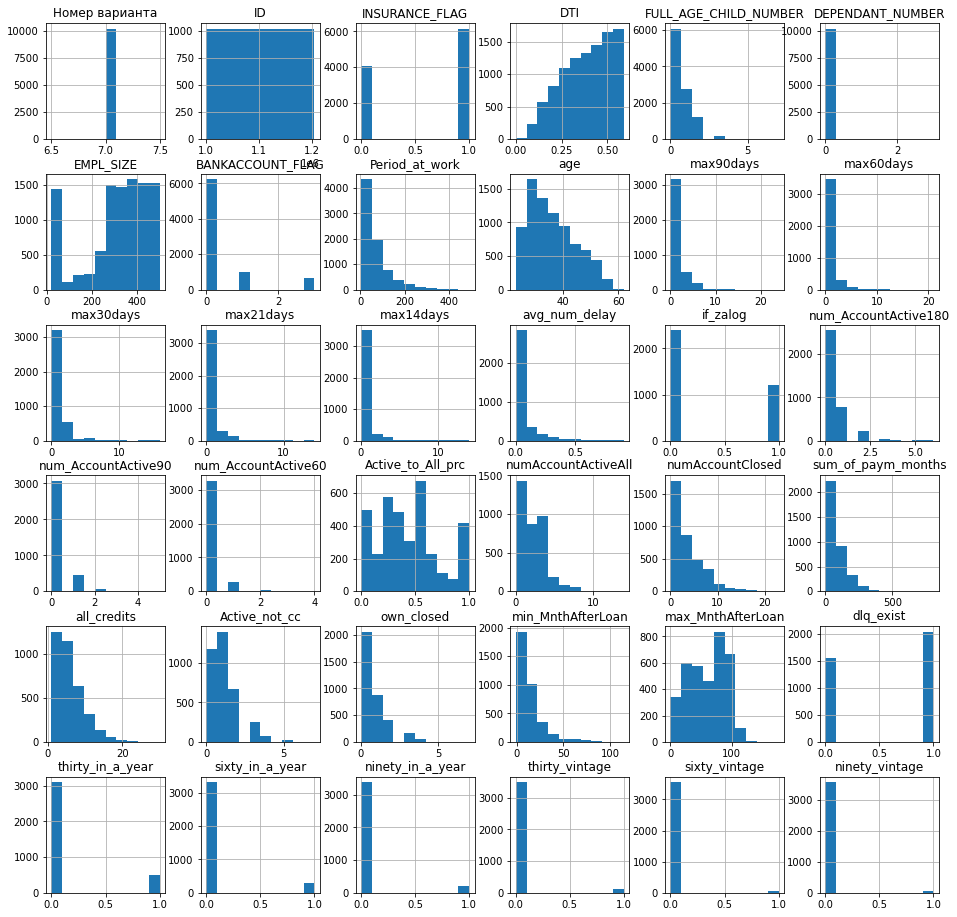

In [45]:
#ГИСТОГРАММЫ ПО ЧИСЛОВЫМ ПЕРЕМЕННЫМ
df.hist(figsize=(16,16))

In [46]:
str_columns = ['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'SEX', 'EDUCATION', 'EMPL_TYPE', 'EMPL_PROPERTY',
 'EMPL_FORM', 'FAMILY_STATUS']

<AxesSubplot:xlabel='count', ylabel='CREDIT_PURPOSE'>

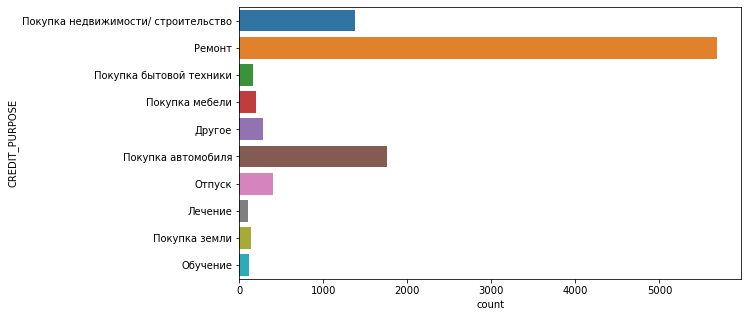

In [47]:
plt.figure(figsize=(9, 5))
sns.countplot(y="CREDIT_PURPOSE", data= df)

<AxesSubplot:xlabel='count', ylabel='INCOME_BASE_TYPE'>

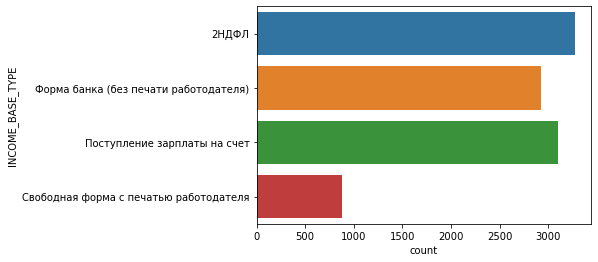

In [48]:
sns.countplot(y="INCOME_BASE_TYPE", data= df)

<AxesSubplot:xlabel='count', ylabel='SEX'>

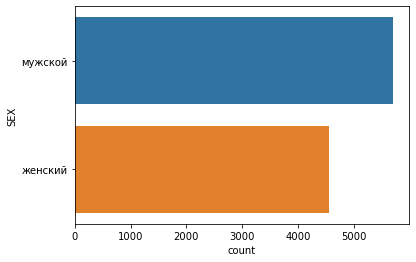

In [49]:
sns.countplot(y="SEX", data= df)

<AxesSubplot:xlabel='count', ylabel='EDUCATION'>

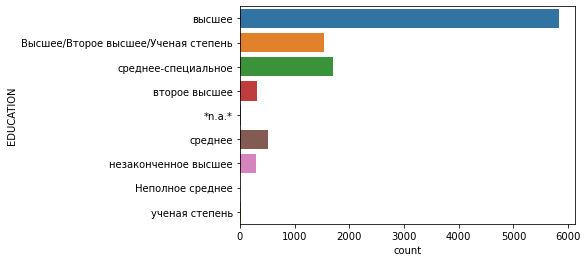

In [50]:
sns.countplot(y="EDUCATION", data= df)

<AxesSubplot:xlabel='count', ylabel='EMPL_TYPE'>

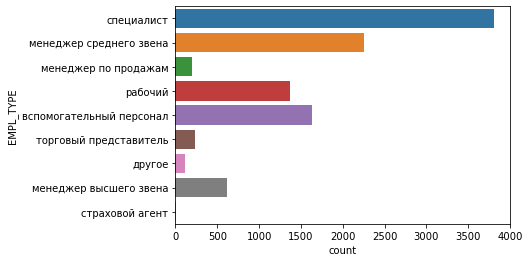

In [51]:
sns.countplot(y="EMPL_TYPE", data= df)

<AxesSubplot:xlabel='count', ylabel='EMPL_PROPERTY'>

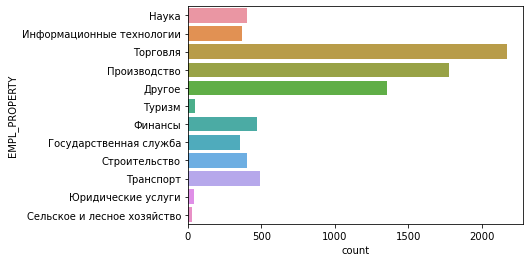

In [52]:
sns.countplot(y="EMPL_PROPERTY", data= df)

<AxesSubplot:xlabel='count', ylabel='EMPL_FORM'>

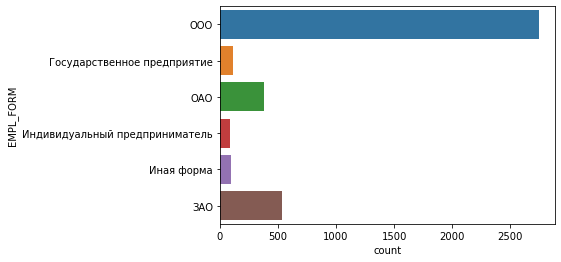

In [53]:
sns.countplot(y="EMPL_FORM", data= df)

<AxesSubplot:xlabel='count', ylabel='FAMILY_STATUS'>

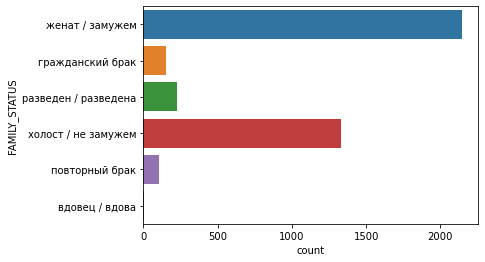

In [54]:
sns.countplot(y="FAMILY_STATUS", data= df)

In [55]:
df.describe()

,Номер варианта,ID,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EMPL_SIZE,BANKACCOUNT_FLAG,Period_at_work,age,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
count,10243.0,1.024300e+04,10243.000000,10120.000000,10243.000000,10243.000000,10121.000000,7908.000000,7906.000000,7908.000000,...,3602.000000,3602.000000,3602.000000,3602.000000,3602.000000,3602.000000,3602.000000,3602.000000,3602.000000,3602.000000
mean,7.0,1.102427e+06,0.600898,0.388604,0.562335,0.003905,311.406976,0.386950,67.427523,36.177542,...,0.716269,14.004442,60.474459,0.569128,0.141588,0.082177,0.061355,0.032482,0.015269,0.013048
std,0.0,5.914087e+04,0.489738,0.137372,0.780858,0.083753,140.590777,0.872694,67.274205,8.553470,...,1.036146,15.103052,30.339091,0.495267,0.348675,0.274672,0.240013,0.177301,0.122639,0.113497
min,7.0,1.000007e+06,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,4.000000,23.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.0,1.051217e+06,0.000000,0.280000,0.000000,0.000000,259.000000,0.000000,21.000000,29.000000,...,0.000000,4.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.0,1.102427e+06,1.000000,0.400000,0.000000,0.000000,341.000000,0.000000,46.000000,35.000000,...,0.000000,10.000000,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.0,1.153637e+06,1.000000,0.490000,1.000000,0.000000,420.000000,0.000000,89.000000,42.000000,...,1.000000,18.000000,86.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.0,1.204847e+06,1.000000,0.590000,7.000000,3.000000,499.000000,3.000000,489.000000,62.000000,...,7.000000,115.000000,177.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
df

,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,7,1000007,2НДФЛ,Покупка недвижимости/ строительство,0,0.57,мужской,1,0,высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,1000027,Форма банка (без печати работодателя),Ремонт,1,0.52,женский,0,0,Высшее/Второе высшее/Ученая степень,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1000047,Поступление зарплаты на счет,Ремонт,1,0.27,женский,0,0,высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,1000067,Поступление зарплаты на счет,Ремонт,1,0.28,женский,0,0,высшее,...,1.0,94.0,97.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,1000087,Поступление зарплаты на счет,Покупка бытовой техники,0,0.23,мужской,0,0,высшее,...,1.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10238,7,1204767,Поступление зарплаты на счет,Ремонт,0,0.36,мужской,0,0,Высшее/Второе высшее/Ученая степень,...,2.0,15.0,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10239,7,1204787,Поступление зарплаты на счет,Покупка недвижимости/ строительство,1,0.23,мужской,0,0,второе высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10240,7,1204807,2НДФЛ,Ремонт,1,0.59,женский,1,0,высшее,...,0.0,18.0,89.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10241,7,1204827,Форма банка (без печати работодателя),Ремонт,0,0.23,мужской,0,0,среднее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df.Period_at_work.fillna(df.Period_at_work.median(), inplace=True)
df.age.fillna(df.age.mode(), inplace=True)

In [60]:
df1 = df.dropna(axis=0, thresh=17)
##удаляем строки с 60% пустых значений

In [61]:
round(df1.isnull().sum()/len(df1)*100,2)

Номер варианта           0.00
ID                       0.00
INCOME_BASE_TYPE         0.00
CREDIT_PURPOSE           0.00
INSURANCE_FLAG           0.00
DTI                      0.00
SEX                      0.00
FULL_AGE_CHILD_NUMBER    0.00
DEPENDANT_NUMBER         0.00
EDUCATION                0.00
EMPL_TYPE                0.00
EMPL_SIZE                0.03
BANKACCOUNT_FLAG         0.00
Period_at_work           0.00
age                      0.00
EMPL_PROPERTY            0.00
EMPL_FORM                0.00
FAMILY_STATUS            0.03
max90days                1.51
max60days                1.51
max30days                1.51
max21days                1.51
max14days                1.51
avg_num_delay            9.46
if_zalog                 9.11
num_AccountActive180     9.11
num_AccountActive90      9.11
num_AccountActive60      9.11
Active_to_All_prc        9.11
numAccountActiveAll      9.11
numAccountClosed         9.11
sum_of_paym_months       9.11
all_credits              9.11
Active_not

In [62]:
df = df1
df2 = df [(df.dlq_exist.isna() == False) & (df.thirty_in_a_year.isna() == False) & (df.thirty_vintage.isna() == False)]
df2.fillna(df2.mean(), inplace=True)
df2

C:\Users\xeny\anaconda3\envs\client_analysis\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\xeny\anaconda3\envs\client_analysis\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
3,7,1000067,Поступление зарплаты на счет,Ремонт,1,0.28,женский,0,0,высшее,...,1.0,94.0,97.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,1000087,Поступление зарплаты на счет,Покупка бытовой техники,0,0.23,мужской,0,0,высшее,...,1.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,1000127,Форма банка (без печати работодателя),Ремонт,1,0.40,женский,1,0,второе высшее,...,0.0,4.0,76.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,1000147,Форма банка (без печати работодателя),Покупка мебели,1,0.50,женский,2,0,среднее-специальное,...,0.0,7.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,7,1000167,Поступление зарплаты на счет,Ремонт,1,0.48,женский,0,0,высшее,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10228,7,1204567,Поступление зарплаты на счет,Покупка бытовой техники,0,0.58,женский,0,0,Высшее/Второе высшее/Ученая степень,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10232,7,1204647,Свободная форма с печатью работодателя,Ремонт,0,0.53,мужской,0,0,высшее,...,1.0,6.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10236,7,1204727,Форма банка (без печати работодателя),Ремонт,0,0.27,женский,1,0,Высшее/Второе высшее/Ученая степень,...,3.0,19.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10238,7,1204767,Поступление зарплаты на счет,Ремонт,0,0.36,мужской,0,0,Высшее/Второе высшее/Ученая степень,...,2.0,15.0,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
df_info = []
for col in df:
    df_info.append(df[col].unique().size)
    zero_count = (df[col] == 0).sum()
    df_info.append(zero_count)
    df_info.append(round((zero_count / df.shape[0]) * 100, 2))
    empty_count = df[col].isna().sum()
    df_info.append(empty_count)
    df_info.append(round((empty_count / df.shape[0]) * 100, 2))

In [67]:
hw_2 = pd.DataFrame(np.array(df_info).reshape(44, 5), columns = ["кол-во уникальных", "кол-во нулей", "доля нулей",
                                                            "кол-во пропущенных","доля пропущенных"], index = df.columns)
hw_2

,кол-во уникальных,кол-во нулей,доля нулей,кол-во пропущенных,доля пропущенных
Номер варианта,1.0,0.0,0.00,0.0,0.00
ID,3963.0,0.0,0.00,0.0,0.00
INCOME_BASE_TYPE,4.0,0.0,0.00,0.0,0.00
CREDIT_PURPOSE,10.0,0.0,0.00,0.0,0.00
INSURANCE_FLAG,2.0,1541.0,38.88,0.0,0.00
DTI,57.0,0.0,0.00,0.0,0.00
SEX,2.0,0.0,0.00,0.0,0.00
FULL_AGE_CHILD_NUMBER,6.0,2438.0,61.52,0.0,0.00
DEPENDANT_NUMBER,4.0,3955.0,99.80,0.0,0.00
EDUCATION,9.0,0.0,0.00,0.0,0.00


In [63]:
df2 = df2.drop(columns = ['ID','Номер варианта'])
df2.isnull().values.any()

True

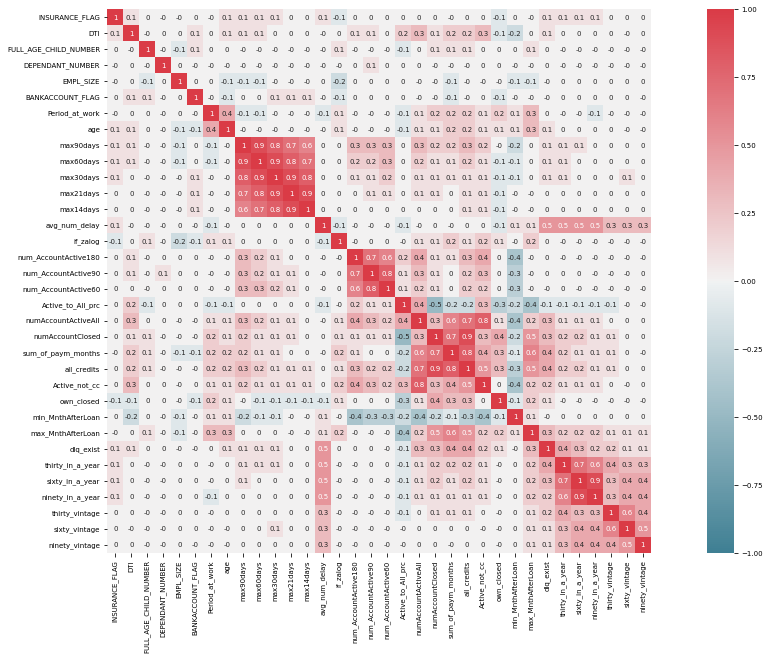

In [70]:
corr = df2.corr() 

f, ax = plt.subplots(figsize=(20, 10))
font = {'size': 7}
plt.rc('font', **font)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(corr.round(1), cmap=cmap, annot=True, vmax=1, vmin=-1, center=0, square=True, linewidths=0, 
                 xticklabels=True, yticklabels=True)


In [71]:
str_columns = ['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'SEX', 'EDUCATION', 'EMPL_TYPE', 'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS']

In [72]:
df3 = df2

In [73]:
df3 = df3.join(pd.get_dummies(df3[str_columns])) 

In [74]:
df3 = df3.drop(columns = str_columns)

In [75]:
df3

,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EMPL_SIZE,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец / вдова,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем
3,1,0.28,0,0,491.0,0.0,154.0,45.0,2.0,2.0,...,0,0,0,1,0,0,1,0,0,0
4,0,0.23,0,0,498.0,0.0,14.0,26.0,2.0,0.0,...,0,0,0,1,0,0,1,0,0,0
6,1,0.40,1,0,469.0,0.0,102.0,36.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,0
7,1,0.50,2,0,417.0,0.0,22.0,27.0,3.0,0.0,...,0,0,0,1,0,1,0,0,0,0
8,1,0.48,0,0,294.0,0.0,25.0,25.0,2.0,1.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10228,0,0.58,0,0,43.0,0.0,174.0,37.0,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1
10232,0,0.53,0,0,454.0,0.0,122.0,44.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
10236,0,0.27,1,0,469.0,0.0,114.0,45.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
10238,0,0.36,0,0,25.0,0.0,73.0,36.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [76]:
pca = PCA(0.95)
df_pca = pca.fit_transform(df3)

In [202]:
pca.n_components_

3

In [77]:
# !!!!!!
scaler = preprocessing.StandardScaler()
# !!!!!!
df_scaled = scaler.fit_transform(df_pca)
df_normalize = preprocessing.normalize(df_scaled)

In [78]:
df_res = pd.DataFrame(df_normalize)

In [79]:
df_res

,0,1,2
0,-0.540996,0.478585,0.691578
1,-0.777416,-0.564066,-0.278307
2,-0.736181,-0.062411,0.673901
3,-0.728666,0.029539,-0.684232
4,-0.028565,-0.998277,-0.051257
...,...,...,...
3597,0.476536,-0.237898,0.846356
3598,-0.364195,0.930445,0.040416
3599,-0.702109,0.278284,0.655440
3600,0.928228,-0.215017,0.303579


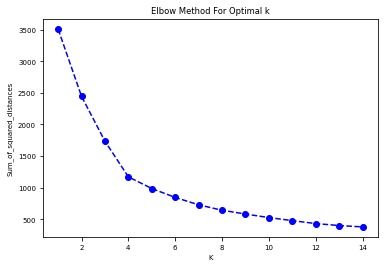

In [80]:
# Elbow method for selecting the optimal number of clusters
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df_res)
    sum_of_squared_distances.append(kmeans.inertia_)
    
plt.plot(K, sum_of_squared_distances, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

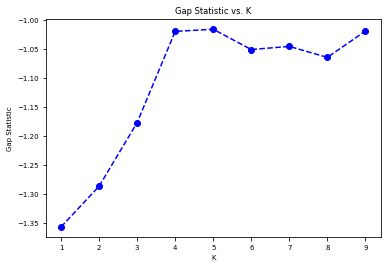

In [81]:
# Gap Statistic for selecting the optimal number of clusters
def optimalK_GAP(data, nrefs=3, maxClusters=15):
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        refDisps = np.zeros(nrefs)
        for i in range(nrefs):
            randomReference = np.random.random_sample(size=data.shape)
            kmeans = KMeans(k).fit(randomReference)
            refDisp = kmeans.inertia_
            refDisps[i] = refDisp
        kmeans = KMeans(k).fit(data)
        origDisp = kmeans.inertia_
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        gaps[gap_index] = gap
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)

score_g, df_gap = optimalK_GAP(df_res, nrefs=3, maxClusters=10)
plt.plot(df_gap['clusterCount'], df_gap['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

In [214]:
kmeans = KMeans(n_clusters=5).fit(df_res)

In [215]:
y_kmeans = kmeans.predict(df_res)

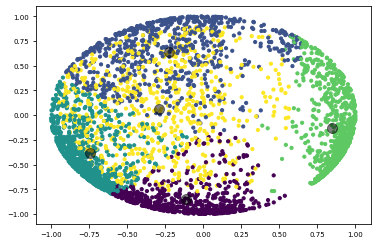

In [217]:
#plt.scatter(df_normalize[:, 0], df_normalize[:, 3], c=y_kmeans, s=10, cmap='viridis')
# !!!!!!
plt.scatter(df_normalize[:, 0], df_normalize[:, 1], c=y_kmeans, s=10, cmap='viridis')
# !!!!!!
centers = kmeans.cluster_centers_

# plt.scatter(centers[:, 0], centers[:, 3], c='black', s=100, alpha=0.5);
# !!!!!!
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);
# !!!!!!

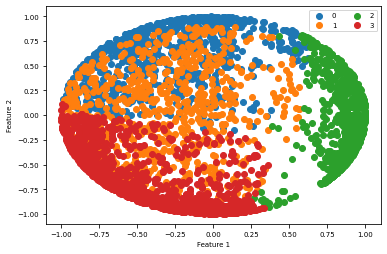

In [211]:
# k means ++ var2
model = KMeans(n_clusters=4, init='k-means++')
model.fit(df_normalize)
yhat = model.predict(df_normalize)
clusters = np.unique(yhat)

for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(df_normalize[row_ix, 0], df_normalize[row_ix, 1], label=cluster)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(ncol=2)
plt.show()

In [218]:
df2['Сегмент'] = kmeans.labels_

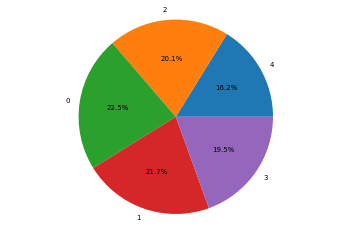

In [219]:
fig, ax = plt.subplots()
ax.pie(df2.groupby(['Сегмент']).count().INSURANCE_FLAG.to_list(), labels = df2['Сегмент'].unique(), autopct='%1.1f%%')
ax.axis('equal')
plt.show()

In [130]:
df2.groupby(['Сегмент']).agg({'Сегмент': len})

,Сегмент
Сегмент,
0,798
1,781
2,727
3,696
4,600


In [131]:
df2.to_excel("сегменты.xlsx")

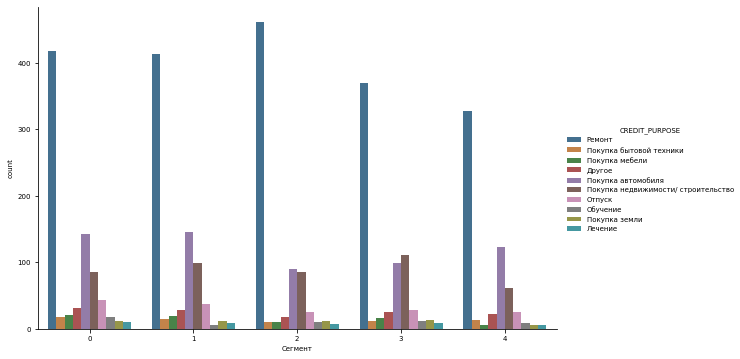

In [137]:



g = sns.catplot(x='Сегмент',
            hue='CREDIT_PURPOSE',
            kind='count',
            data=df2, saturation=0.5, ci=None, aspect=1.6)



array([[<AxesSubplot:title={'center':'INSURANCE_FLAG'}>,
        <AxesSubplot:title={'center':'DTI'}>,
        <AxesSubplot:title={'center':'FULL_AGE_CHILD_NUMBER'}>,
        <AxesSubplot:title={'center':'DEPENDANT_NUMBER'}>,
        <AxesSubplot:title={'center':'EMPL_SIZE'}>,
        <AxesSubplot:title={'center':'BANKACCOUNT_FLAG'}>],
       [<AxesSubplot:title={'center':'Period_at_work'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'max90days'}>,
        <AxesSubplot:title={'center':'max60days'}>,
        <AxesSubplot:title={'center':'max30days'}>,
        <AxesSubplot:title={'center':'max21days'}>],
       [<AxesSubplot:title={'center':'max14days'}>,
        <AxesSubplot:title={'center':'avg_num_delay'}>,
        <AxesSubplot:title={'center':'if_zalog'}>,
        <AxesSubplot:title={'center':'num_AccountActive180'}>,
        <AxesSubplot:title={'center':'num_AccountActive90'}>,
        <AxesSubplot:title={'center':'num_AccountActive60'}>],
   

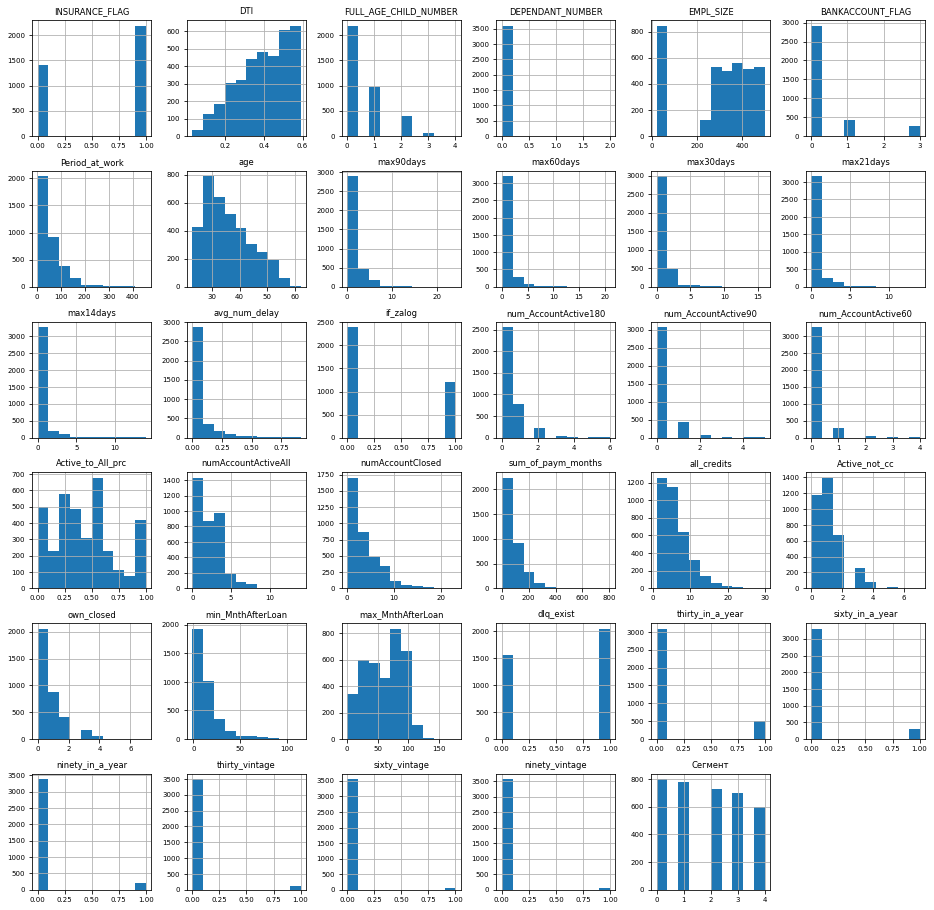

In [138]:
df2.hist(figsize=(16,16))

array([[<AxesSubplot:title={'center':'INSURANCE_FLAG'}>,
        <AxesSubplot:title={'center':'DTI'}>,
        <AxesSubplot:title={'center':'FULL_AGE_CHILD_NUMBER'}>,
        <AxesSubplot:title={'center':'DEPENDANT_NUMBER'}>,
        <AxesSubplot:title={'center':'EMPL_SIZE'}>,
        <AxesSubplot:title={'center':'BANKACCOUNT_FLAG'}>,
        <AxesSubplot:title={'center':'Period_at_work'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'max90days'}>,
        <AxesSubplot:title={'center':'max60days'}>,
        <AxesSubplot:title={'center':'max30days'}>,
        <AxesSubplot:title={'center':'max21days'}>,
        <AxesSubplot:title={'center':'max14days'}>,
        <AxesSubplot:title={'center':'avg_num_delay'}>],
       [<AxesSubplot:title={'center':'if_zalog'}>,
        <AxesSubplot:title={'center':'num_AccountActive180'}>,
        <AxesSubplot:title={'center':'num_AccountActive90'}>,
        <AxesSubplot:title={'center':'num_AccountActive60'}>,
    

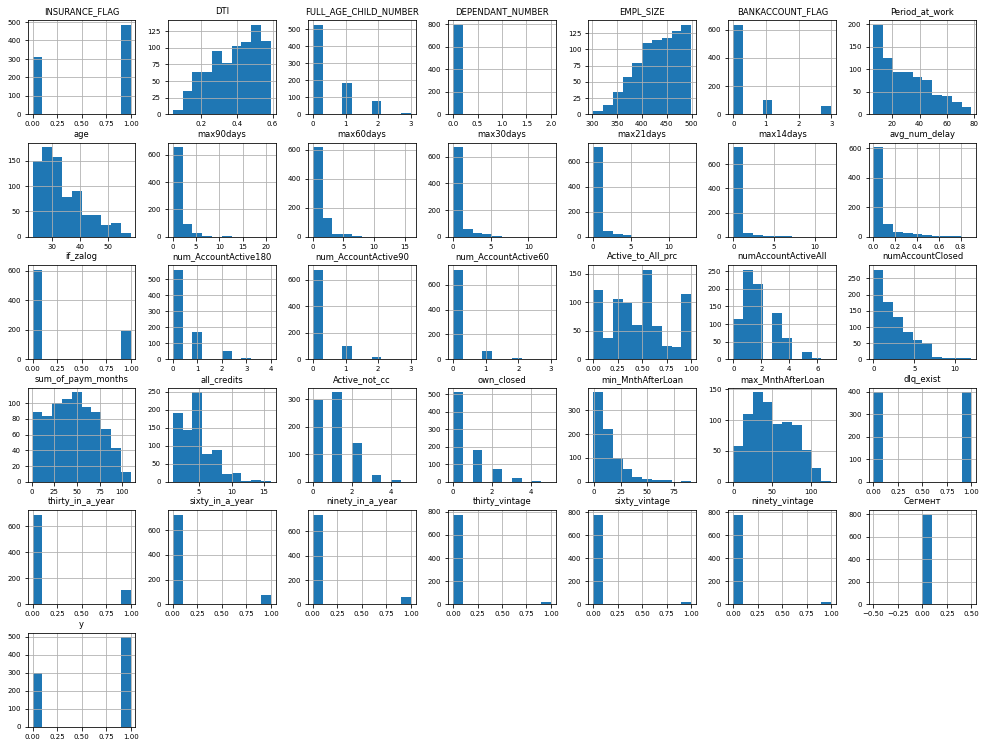

In [201]:
df2[df2['Сегмент']==0].hist(layout=(6,7), figsize=(17,13))

In [153]:
df2['y'] = 0

In [154]:
# df2.loc[(df2.dlq_exist == 0) & (df2.thirty_in_a_year == 0) & (df2.ninety_vintage == 0), 'y'] = 1

In [173]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3602 entries, 3 to 10240
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INCOME_BASE_TYPE       3602 non-null   object 
 1   CREDIT_PURPOSE         3602 non-null   object 
 2   INSURANCE_FLAG         3602 non-null   int64  
 3   DTI                    3602 non-null   float64
 4   SEX                    3602 non-null   object 
 5   FULL_AGE_CHILD_NUMBER  3602 non-null   int64  
 6   DEPENDANT_NUMBER       3602 non-null   int64  
 7   EDUCATION              3602 non-null   object 
 8   EMPL_TYPE              3602 non-null   object 
 9   EMPL_SIZE              3602 non-null   float64
 10  BANKACCOUNT_FLAG       3602 non-null   float64
 11  Period_at_work         3602 non-null   float64
 12  age                    3602 non-null   float64
 13  EMPL_PROPERTY          3602 non-null   object 
 14  EMPL_FORM              3602 non-null   object 
 15  FAM

In [227]:
df2.loc[(df2.dlq_exist == 0) & (df2.thirty_in_a_year == 0) & (df2.ninety_vintage == 0), 'y'] = 1

In [228]:
df_three = df2.drop(
    ['dlq_exist','thirty_in_a_year','sixty_in_a_year','ninety_in_a_year','thirty_in_a_year', 
     'thirty_vintage', 'sixty_vintage', 'ninety_vintage', 'avg_num_delay'], axis=1)

In [229]:
df_three = df_three.join(pd.get_dummies(df_three[str_columns]))

In [230]:
df_three = df_three.drop(columns = str_columns)

In [231]:
y = df_three['y']
X = df_three.drop('y', axis=1)

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [233]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

predict_test = clf.predict(X_test)
predict_train = clf.predict(X_train)

[Text(0.3958333333333333, 0.9, 'INSURANCE_FLAG <= 0.5\nsamples = 2881\nvalue = [1324, 1557]\nclass = y[1]'),
 Text(0.125, 0.7, 'if_zalog <= 0.5\n1116\n[233, 883]\ny[1]'),
 Text(0.08333333333333333, 0.5, '695\n[0, 695]\ny[1]'),
 Text(0.16666666666666666, 0.5, 'sum_of_paym_months <= 110.0\n421\n[233, 188]\ny[0]'),
 Text(0.08333333333333333, 0.3, 'all_credits <= 2.5\n250\n[96, 154]\ny[1]'),
 Text(0.041666666666666664, 0.1, '50\n[8, 42]\ny[1]'),
 Text(0.125, 0.1, '200\n[88, 112]\ny[1]'),
 Text(0.25, 0.3, 'numAccountClosed <= 3.5\n171\n[137, 34]\ny[0]'),
 Text(0.20833333333333334, 0.1, '32\n[20, 12]\ny[0]'),
 Text(0.2916666666666667, 0.1, '139\n[117, 22]\ny[0]'),
 Text(0.6666666666666666, 0.7, 'sum_of_paym_months <= 37.5\n1765\n[1091, 674]\ny[0]'),
 Text(0.5, 0.5, 'max_MnthAfterLoan <= 10.5\n553\n[187, 366]\ny[1]'),
 Text(0.4166666666666667, 0.3, 'sum_of_paym_months <= 18.5\n83\n[8, 75]\ny[1]'),
 Text(0.375, 0.1, '78\n[5, 73]\ny[1]'),
 Text(0.4583333333333333, 0.1, '5\n[3, 2]\ny[0]'),
 Text

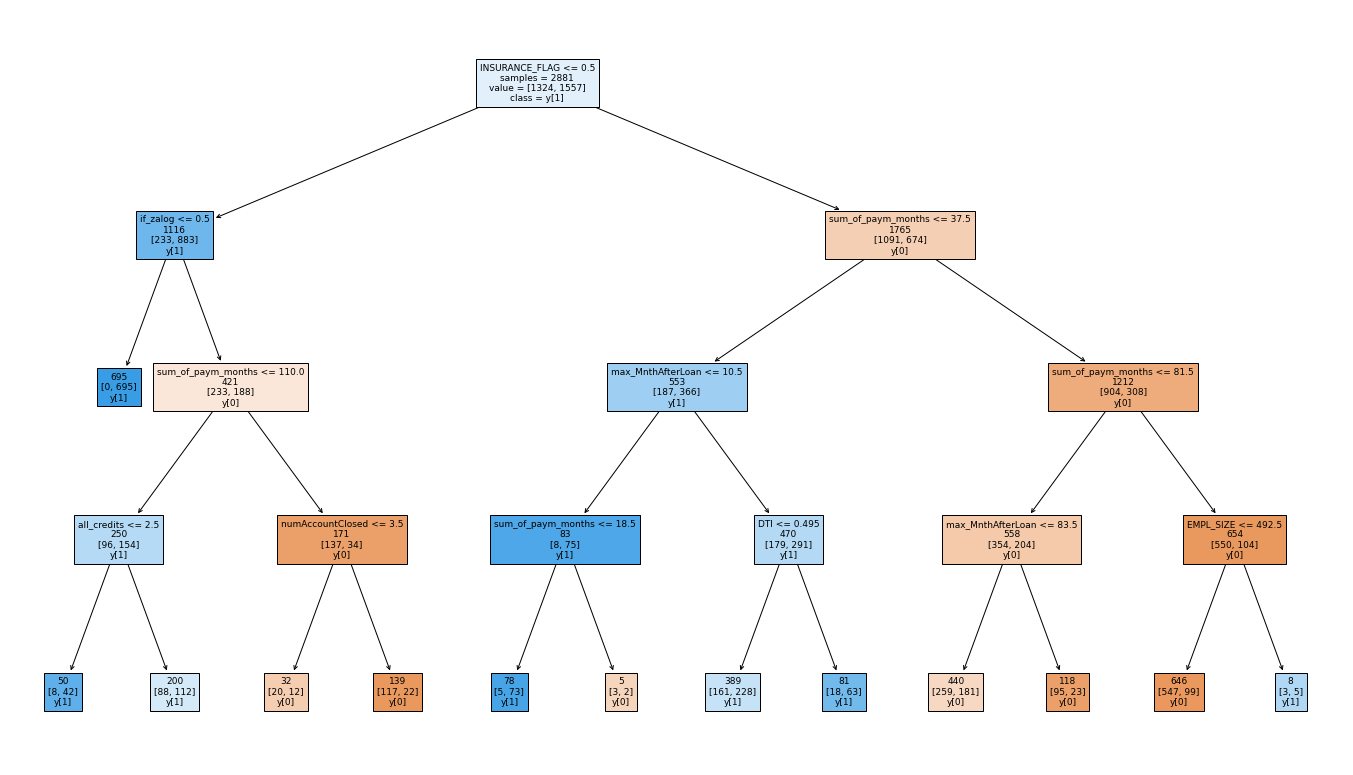

In [234]:
fig = plt.figure(figsize=(24, 14))
tree.plot_tree(clf, fontsize=9, feature_names=X.columns, filled=True, label="root", impurity=False, class_names=True)

In [1]:
print('train roc_auc_score =', roc_auc_score(predict_train, y_train))
print('test roc_auc_score =', roc_auc_score(predict_test, y_test))

NameError: name 'roc_auc_score' is not defined